In [1]:
from kawin.Thermodynamics import MulticomponentThermodynamics
from kawin.KWNEuler import PrecipitateModel
from kawin.Surrogate import MulticomponentSurrogate, generateTrainingPoints
import numpy as np
import matplotlib.pyplot as plt

elements = ['NI', 'AL', 'CR']
phases = ['FCC_A1', 'FCC_L12']
therm = MulticomponentThermodynamics('NiCrAl.tdb', elements, phases)

t0, tf, steps = 1e-1, 1e6, 2e4
model = PrecipitateModel(t0, tf, steps, elements=['AL', 'CR'])

model.setInitialComposition([0.10, 0.085])
model.setInterfacialEnergy(0.023)

T = 1073
model.setTemperature(T)

a = 0.352e-9
Va = a**3
Vb = Va
atomsPerCell = 4
model.setVaAlpha(Va, atomsPerCell)
model.setVaBeta(Vb, atomsPerCell)

model.setNucleationSite('dislocations')
model.setNucleationDensity(dislocationDensity=5e12)

In [2]:
surr = MulticomponentSurrogate(therm)

xAl = np.linspace(0.05, 0.11, 8)
xCr = np.linspace(0.05, 0.1, 8)
xTrain = generateTrainingPoints(xAl, xCr)
surr.trainDrivingForce(xTrain, T)

xAl = np.linspace(0.1, 0.23, 16)
xCr = np.linspace(0, 0.1, 16)
xTrain = generateTrainingPoints(xAl, xCr)
surr.trainCurvature(xTrain, T)

model.setSurrogate(surr)

In [3]:
model.solve(verbose=True, vIt=5000)
model.save('NiCrAl')

N	Time (s)	Temperature (K)	AL	CR	
5000	5.6e+00		1073		9.9976	8.5006	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	1.350e+21		0.0321		3.6240e-09	2.6139e+02

N	Time (s)	Temperature (K)	AL	CR	
10000	3.2e+02		1073		9.0894	8.7684	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	1.351e+21		10.7525		2.6581e-08	3.6210e+01

N	Time (s)	Temperature (K)	AL	CR	
15000	1.8e+04		1073		8.8093	8.8528	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	5.998e+20		13.9549		3.6150e-08	8.3375e+00

N	Time (s)	Temperature (K)	AL	CR	
20000	1.0e+06		1073		8.7760	8.8615	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	1.099e+19		14.3638		1.3757e-07	2.1756e+00

Finished in 41.821 seconds.


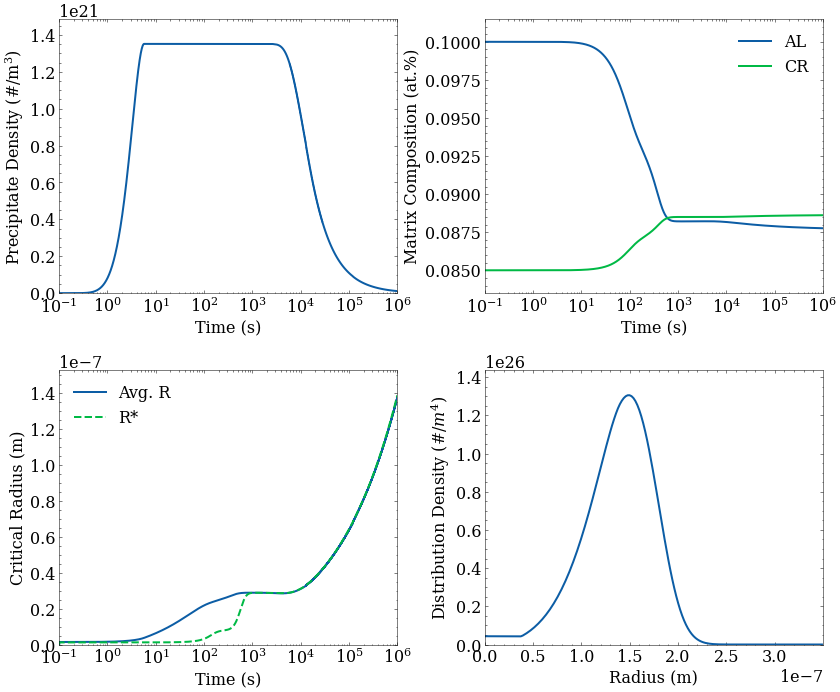

In [9]:
plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(2, 2, figsize=(12,10))

model = PrecipitateModel.load('NiCrAl.npz')

model.plot(axes[0,0], 'Precipitate Density', linewidth=2)
model.plot(axes[0,1], 'Composition', linewidth=2)
model.plot(axes[1,0], 'Average Radius', color='C0', linewidth=2, label='Avg. R')
model.plot(axes[1,0], 'Critical Radius', color='C1', linewidth=2, linestyle='--', label='R*')
axes[1,0].legend(loc='upper left')
model.plot(axes[1,1], 'Size Distribution Density', linewidth=2, color='C0')

fig.tight_layout()
plt.show()